# COMP5046 Assignment 1

# 1 - Data Preprocessing

## 1.1 Download Dataset

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  

import pickle
training_data = pickle.load(open("training_data.pkl","rb"))
testing_data = pickle.load(open("testing_data.pkl","rb"))

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


In [ ]:
# list  len->8000
len(training_data), len(testing_data)
# type(training_data)

(8000, 2000)

In [ ]:
training_data[0], testing_data[0]

(('neg', 'hopeless for tmr :('),
 ('neg',
  '@AndreaMarySmith very helpful .... Or will be once I stop crying :('))

In [ ]:
# check the number of positive sentences and negative sentences in the training data
train_po = 0
train_ne = 0
for i in training_data:
    if i[0]=='pos':
        train_po += 1
    else:
        train_ne +=1
    # print(i[0])
print(train_po, train_ne)

4000 4000


In [ ]:
# check the number of positive sentences and negative sentences in the testing data
test_po = 0
test_ne = 0
for i in testing_data:
    if i[0]=='pos':
        test_po += 1
    else:
        test_ne +=1
    # print(i[0])
print(test_po, test_ne)

1000 1000


## 1.2 Preprocess Data

In [ ]:
# check the original sentences of the training dataset
training_data[:3]

[('neg', 'hopeless for tmr :('),
 ('neg',
  "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :("),
 ('neg', '@Hegelbon That heart sliding into the waste basket. :(')]

In [ ]:
# Split sentence and label
train_text = []
train_label = []
for i in training_data:
    train_text.append(i[1])
    train_label.append(i[0])
    
test_text = []
test_label = []
for i in testing_data:
    test_text.append(i[1])
    test_label.append(i[0])

train_label[:3], test_label[-3:]

(['neg', 'neg', 'neg'], ['pos', 'pos', 'pos'])

In [ ]:
# Case Folding
train_text = [t.lower() for t in train_text]
test_text = [t.lower() for t in test_text]

In [ ]:
train_text[2709]

'guys add my kik - mune874 #kik #kikme #tagsforlikes #snapme #bored #hannibal #kikgirl :( http://t.co/ax26wgydra'

In [ ]:
# Remove the punctuation.    ######## replace Emoji with its meaning #######
import re

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '') # replace the puctuations by space
    return x


def remove_punctuation_re(x):
    x = x.replace(':)', 'smile')
    x = x.replace(':D', 'smile')
    x = x.replace('^-^', 'happy')
    x = x.replace(':-)', 'happy')
    x = x.replace(':(', 'sad')
    x = x.replace(':-(', 'sad')
    x = re.sub(r'https?://\S+','',x) # remove URL
    x = remove_punctuation(x)


    # x = re.sub(r'[^\w\s+]','',x)
    x = re.sub(r'[0-9]','',x) # remove numbers
    # # x = re.sub(r'\s+','',x)  # remove extra white spaces
    # x = re.sub(r'\([^)]*\)','',x)
    # # x = re.sub(r'[^a-z]+','',x). r'[0-9]'

    # # \w: 0-9a-zA-Z  \s: white space  ^: not
    # # ignore \w and \s, other than this then replace
    return x

train_text = [remove_punctuation_re(t) for t in train_text]
test_text = [remove_punctuation_re(t) for t in test_text]

In [ ]:
train_text[2709]

'guys add my kik  mune kik kikme tagsforlikes snapme bored hannibal kikgirl sad '

In [ ]:
train_text[:3]

['hopeless for tmr sad',
 'everything in the kids section of ikea is so cute shame im nearly  in  months sad',
 'hegelbon that heart sliding into the waste basket sad']

In [ ]:
# Tokenisation
import nltk

# from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

train_text = [tknzr.tokenize(t) for t in train_text]
test_text = [tknzr.tokenize(t) for t in test_text]

In [ ]:
train_text[:3]

[['hopeless', 'for', 'tmr', 'sad'],
 ['everything',
  'in',
  'the',
  'kids',
  'section',
  'of',
  'ikea',
  'is',
  'so',
  'cute',
  'shame',
  'im',
  'nearly',
  'in',
  'months',
  'sad'],
 ['hegelbon',
  'that',
  'heart',
  'sliding',
  'into',
  'the',
  'waste',
  'basket',
  'sad']]

In [ ]:
# Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

train_text_ns=[]
for tokens in train_text:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    train_text_ns.append(filtered_sentence)

test_text_ns=[]
for tokens in test_text:
    #Please complete this
    filtered_sentence = [w for w in tokens if not w in stop_words]
    test_text_ns.append(filtered_sentence)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_text_ns[:3]

[['hopeless', 'tmr', 'sad'],
 ['everything',
  'kids',
  'section',
  'ikea',
  'cute',
  'shame',
  'nearly',
  'months',
  'sad'],
 ['hegelbon', 'heart', 'sliding', 'waste', 'basket', 'sad']]

In [ ]:
# # remove wrong words
# nltk.download('words')
# words = set(nltk.corpus.words.words())
# train_text_wd=[]
# for tokens in train_text_ns:
#     filtered_sentence = [w for w in tokens if w in words]
#     train_text_wd.append(filtered_sentence)

# test_text_wd=[]
# for tokens in test_text_ns:
#     #Please complete this
#     filtered_sentence = [w for w in tokens if  w in words]
#     test_text_wd.append(filtered_sentence)

In [ ]:
# train_text_wd[:3]

In [ ]:
# Lemmatisation
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

train_text_le = []
for tokens in train_text_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    train_text_le.append(lemma_sentence)

test_text_le = []
for tokens in test_text_ns:
    #Please complete this
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens]
    test_text_le.append(lemma_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train_text_le[:3]

[['hopeless', 'tmr', 'sad'],
 ['everything',
  'kid',
  'section',
  'ikea',
  'cute',
  'shame',
  'nearly',
  'month',
  'sad'],
 ['hegelbon', 'heart', 'sliding', 'waste', 'basket', 'sad']]

In [ ]:
# Label Encoding -> 0 / 1
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(train_label)

lEnc = LabelEncoder()

train_label_encoded = lEnc.fit(unique_labels).transform(train_label)
test_label_encoded = lEnc.transform(test_label)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

['neg' 'pos']
[0 1]


In [ ]:
train_label_encoded[:3], test_label_encoded[-3:]

(array([0, 0, 0]), array([1, 1, 1]))

# 2 - Model Implementation

## 2.1 Word Embedding

### 2.1.1 Data Preprocessing for Word Embeddings

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')   # TED Scripts

In [ ]:
from lxml import etree 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)
content_text = re.sub(r'[0-9]','',content_text) # remove numbers in string

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
token_sentences=[]
token_sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Remove stopwords
sentences = [] # around 3m
for tokens in token_sentences:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    sentences.append(filtered_sentence)

print(sentences[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[['two', 'reasons', 'companies', 'fail', 'new'], ['real', 'real', 'solution', 'quality', 'growth', 'figuring', 'balance', 'two', 'activities', 'exploration', 'exploitation'], ['necessary', 'much', 'good', 'thing'], ['consider', 'facit'], ['actually', 'old', 'enough', 'remember'], ['facit', 'fantastic', 'company'], ['born', 'deep', 'swedish', 'forest', 'made', 'best', 'mechanical', 'calculators', 'world'], ['everybody', 'used'], ['facit', 'electronic', 'calculator', 'came', 'along'], ['continued', 'exactly']]


In [ ]:
print(train_text_le[:3])

[['hopeless', 'tmr', 'sad'], ['everything', 'kid', 'section', 'ikea', 'cute', 'shame', 'nearly', 'month', 'sad'], ['hegelbon', 'heart', 'sliding', 'waste', 'basket', 'sad']]


In [ ]:
mix_text = sentences + train_text_le + test_text_le # (283851 sentences)

In [ ]:
word_list = set()  # 65102  unique words
for item in mix_text:
    for word in item:
        word_list.add(word)

### 2.1.2 Build and Train Word Embeddings Model

In [ ]:
from gensim.models import FastText 

In [ ]:
# FastText - CBOW - #2
ftcb_model = FastText(mix_text, size=100, window=10, min_count=5, workers=2, sg=0, iter=15, alpha=0.1)  
ftcb_model.wv.save_word2vec_format('ftcb2.txt', binary=False)

In [ ]:
vectors_file='ftcb2.txt' #21841 --> F1 98.50
# vectors_file='ftcb6.txt' #21841 --> F1 98.55 
with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

In [ ]:
train_vec = []  # 8000 sentenses
for item in train_text_le:
  item_vec = []
  for word in item:
    if word in vectors:
      item_vec.append(vectors[word])
    else:
      item_vec.append([0]*100)
  train_vec.append(item_vec)

In [ ]:
test_vec = []  # 2000 sentenses
for item in test_text_le:
  item_vec = []
  for word in item:
    if word in vectors:
      item_vec.append(vectors[word])
    else:
      item_vec.append([0]*100)
  test_vec.append(item_vec)

In [ ]:
print(train_vec[0])

[[-0.27548966, -0.87297475, -1.4924971, 0.50904614, 0.84099114, 0.2894144, -0.27947074, 1.814979, -1.6729562, 0.2920522, -2.1306372, -0.08185486, 0.86450106, 0.6144696, -0.6352292, -1.5939941, -1.0746781, 0.23139833, -0.67334723, -0.37361982, -0.60869825, -0.5441695, -1.8881048, 0.28597465, -0.4701925, 0.19089374, 0.59644663, 1.6424721, -0.2698105, -0.44504187, -0.6041988, -1.2708011, -0.5084862, -0.15407819, 0.5803912, 1.2217414, 0.7863958, 0.29471228, -0.31628853, -1.168541, -0.44518006, 0.42447096, -0.21400796, 0.21041438, -0.7180362, 0.44620535, 0.8480963, 1.0839365, -0.389809, 0.74642515, -0.3212248, 1.443086, -0.7211696, -0.77151793, 0.6391997, -0.65032774, -0.785646, 0.5536412, 0.114285775, -0.38857836, 0.7075865, -0.30049264, 0.22256552, -0.26302683, 1.1275167, -1.4419612, 0.4494003, -1.3996435, -0.26097938, 0.16843557, 0.6558032, -0.3256249, -0.5417565, -0.17876221, 0.21958658, -0.11397861, 1.2446189, 1.0718074, 1.4415456, 0.39811555, 0.40173453, -0.6027861, -0.8344691, -1.621

## 2.2 Lexicon Embeddings

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1HG0WNmdQZRL5vkjRhh36P5v6tALNw_j9'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('negative_words.txt')  

id = '1KktIZyPZn5UgBG1Mjw7DoBIG4uDFkiZ6'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('positive_words.txt')  

In [ ]:
pos = open("positive_words.txt","r", encoding = "ISO-8859-1") # 2
pos_lex = pos.readlines()
pos_lex = [item.strip() for item in pos_lex]

neg = open("negative_words.txt","r", encoding = "ISO-8859-1") # 1
neg_lex = neg.readlines()
neg_lex = [item.strip() for item in neg_lex]

# not exist -> 0

In [ ]:
pos_lex[:4], neg_lex[:4]

(['a+', 'abound', 'abounds', 'abundance'],
 ['2-faced', '2-faces', 'abnormal', 'abolish'])

In [ ]:
# word_list -->   # 65102 unique words
all_word = list(word_list)
all_word.sort()
# all_word
all_word_lex = {}
for word in all_word:
  if word in pos_lex:
    all_word_lex[word] = 2
  elif word in neg_lex:
    all_word_lex[word] = 1
  else:
    all_word_lex[word] = 0

In [ ]:
train_lex = []  # 8000 sentenses
for item in train_text_le:
  item_lex = []
  for word in item:
    item_lex.append(all_word_lex[word])
  train_lex.append(item_lex)

test_lex = []  # 2000 sentenses
for item in test_text_le:
  item_lex = []
  for word in item:
    item_lex.append(all_word_lex[word])
  test_lex.append(item_lex)

In [ ]:
test_text_le[:3]

[['andreamarysmith', 'helpful', 'stop', 'cry', 'sad'],
 ['realyys', 'otl', 'nevermind', 'sad', 'least', 'got', 'jeon'],
 ['soon',
  'tweeted',
  'planted',
  'claw',
  'thigh',
  'traction',
  'zoomed',
  'away',
  'sad']]

In [ ]:
test_lex[:3]

[[0, 2, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 1]]

In [ ]:
train_text_le[:3]

[['hopeless', 'tmr', 'sad'],
 ['everything',
  'kid',
  'section',
  'ikea',
  'cute',
  'shame',
  'nearly',
  'month',
  'sad'],
 ['hegelbon', 'heart', 'sliding', 'waste', 'basket', 'sad']]

In [ ]:
train_lex[:3]

[[1, 0, 1], [0, 0, 0, 0, 2, 1, 0, 0, 1], [0, 0, 0, 1, 0, 1]]

## 2.3 Bi_directional LSTM Sequence Model

### 2.3.1 Apply/Import Word Embedding and Lexicon Embedding

In [ ]:
## Word Embedding         ## Lexicon Embedding              ## Processed Data         ## Encoded Label
# train_vec   8000        # train_lex   8000  0/1/2         # train_text_le 8000      # train_label_encoded   8000 -> 0/1
# test_vec    2000        # test_lex    2000  0/1/2         # test_text_le  2000      # test_label_encoded    2000 -> 0/1

In [ ]:
# set the seq_length
len_list_train = [len(s) for s in train_vec]
seq_length_train = max(len_list_train) # 44

len_list_test = [len(s) for s in test_vec]
seq_length_test = max(len_list_test) # 26

seq_length = max(seq_length_train, seq_length_test)  # 44

In [ ]:
# all_word_lex --> word dic with 0/1/2 emotion
# vectors --> word dic with vectors  

In [ ]:
# Word Vectors + lexicon embedding
def word_vec_lex(sentences):
  sent_encoded = []
  for sent in sentences:
    temp_encoded = []
    for word in sent:
      if word in vectors:
        temp_encoded.append((vectors[word]+[all_word_lex[word]]))
        # temp_encoded.append(all_word_lex[word])
      else:
        temp_encoded.append([0]*101)
    if len(temp_encoded)>=seq_length:
      sent_encoded.append(temp_encoded[:seq_length])
    else:
      temp_encoded = temp_encoded + [[0]*101] * (seq_length - len(temp_encoded)) 
      sent_encoded.append(temp_encoded)

  return sent_encoded

In [ ]:
train_emb = word_vec_lex(train_text_le)
test_emb = word_vec_lex(test_text_le)

train_embeddings = np.array(train_emb)
print(train_embeddings.shape)

test_embeddings = np.array(test_emb)
print(test_embeddings.shape)

(8000, 44, 101)
(2000, 44, 101)


### 2.3.2 Build Sequence Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Bi_LSTM_Model(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(n_input, n_hidden, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden,n_class)

    def forward(self, x):        
        lstm_out, (h_n,c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)

        return output

In [ ]:
n_input = train_embeddings.shape[2]
n_class = np.unique(train_label_encoded).shape[0]
n_hidden = 200
batch_size = 256
total_epoch = 10

### 2.3.3 Train Sequence Model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import torch.optim as optim



model = Bi_LSTM_Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)

input_torch = torch.from_numpy(np.array(train_embeddings)).float().to(device)
target_torch = torch.from_numpy(np.array(train_label_encoded)).view(-1).to(device)

history_lstm = []
for epoch in range(total_epoch):
    train_loss = 0
    f1 = 0
    for ind in range(0, train_embeddings.shape[0], batch_size):
        input_batch = train_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
        target_batch = train_label_encoded[ind:min(ind+batch_size, train_embeddings.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

        test_input_torch = torch.from_numpy(test_embeddings).float().to(device)
        test_target_torch = torch.from_numpy(test_label_encoded).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        test_outputs = model(test_input_torch) 

        loss = criterion(outputs, target_batch_torch)
        test_loss = criterion(test_outputs, test_target_torch)

        loss.backward()
        optimizer.step()
        predicted = torch.argmax(outputs, 1)
        test_predicted = torch.argmax(test_outputs, 1)
        train_loss += loss.item()
        
    f1 = f1_score(predicted.cpu().numpy(), target_batch_torch.cpu().numpy(), average = 'weighted')
    test_f1 = f1_score(test_predicted.cpu().numpy(), test_target_torch.cpu().numpy(), average = 'weighted')
    print('Epoch: %d, train loss: %.5f, train f1 score: %.5f, test f1 score: %.5f'%(epoch + 1, train_loss, f1, test_f1))
    history_lstm.append(test_f1)

print('Finished Training')

torch.save(model,'Bi-LSTM.pt')

Epoch: 1, train loss: 89.30876, train f1 score: 0.00048, test f1 score: 0.66394
Epoch: 2, train loss: 20.33705, train f1 score: 0.68531, test f1 score: 0.79611
Epoch: 3, train loss: 16.38785, train f1 score: 1.00000, test f1 score: 0.71607
Epoch: 4, train loss: 15.48389, train f1 score: 0.86168, test f1 score: 0.94003
Epoch: 5, train loss: 4.34270, train f1 score: 0.97662, test f1 score: 0.98150
Epoch: 6, train loss: 2.84576, train f1 score: 0.97662, test f1 score: 0.98500
Epoch: 7, train loss: 1.98599, train f1 score: 1.00000, test f1 score: 0.98550
Epoch: 8, train loss: 1.87967, train f1 score: 1.00000, test f1 score: 0.98700
Epoch: 9, train loss: 1.55496, train f1 score: 1.00000, test f1 score: 0.98700
Epoch: 10, train loss: 1.47274, train f1 score: 1.00000, test f1 score: 0.98650
Finished Training


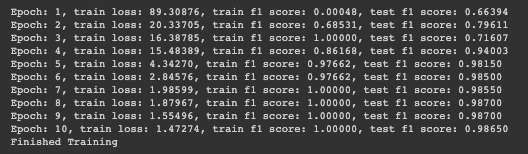

# 3 - Evaluation

## 3.1 Word Embedding Evaluation

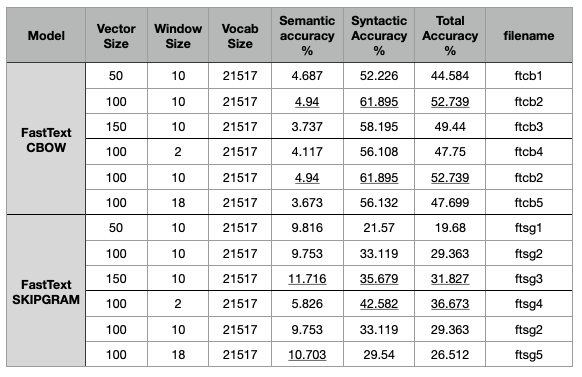

In [ ]:
!git clone https://github.com/stanfordnlp/GloVe.git

def evaluate_word_embedding(vectors_file):
  with open(vectors_file, 'r') as f:
    vectors = {}
    for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
      vals = line.rstrip().split(' ')
      vectors[vals[0]] = [float(x) for x in vals[1:]]

  vocab_words=list(vectors.keys())
  vocab_size = len(vocab_words)
  print("Vocab size: ",str(vocab_size))

  # create word->index and index->word converter
  vocab = {w: idx for idx, w in enumerate(vocab_words)}
  ivocab = {idx: w for idx, w in enumerate(vocab_words)}

  # create the embedding matrix of shape (vocab_size, dim)
  vector_dim = len(vectors[ivocab[0]])
  W = np.zeros((vocab_size, vector_dim))
  for word, v in vectors.items():
      if word == '<unk>':
          continue
      W[vocab[word], :] = v

  # normalize each word vector to unit length
  # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
  W_norm = np.zeros(W.shape)
  d = (np.sum(W ** 2, 1) ** (0.5))
  W_norm = (W.T / d).T

  def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
      """Evaluate the trained word vectors on a variety of tasks"""

      filenames = [
          'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
          'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
          'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
          'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
          'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
          ]

      # to avoid memory overflow, could be increased/decreased
      # depending on system and vocab size
      split_size = 100

      correct_sem = 0; # count correct semantic questions
      correct_syn = 0; # count correct syntactic questions
      correct_tot = 0 # count correct questions
      count_sem = 0; # count all semantic questions
      count_syn = 0; # count all syntactic questions
      count_tot = 0 # count all questions
      full_count = 0 # count all questions, including those with unknown words

      for i in range(len(filenames)):
          with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
              full_data = [line.rstrip().split(' ') for line in f]
              full_count += len(full_data)
              data = [x for x in full_data if all(word in vocab for word in x)]

          if len(data) == 0:
            #   print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            #   print("Example missing line:", full_data[0])
              continue

          indices = np.array([[vocab[word] for word in row] for row in data])
          ind1, ind2, ind3, ind4 = indices.T

          predictions = np.zeros((len(indices),))
          num_iter = int(np.ceil(len(indices) / float(split_size)))
          for j in range(num_iter):
              subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

              pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                  +  W[ind3[subset], :])

              #cosine similarity if input W has been normalized
              dist = np.dot(W, pred_vec.T)


              for k in range(len(subset)):
                  dist[ind1[subset[k]], k] = -np.Inf
                  dist[ind2[subset[k]], k] = -np.Inf
                  dist[ind3[subset[k]], k] = -np.Inf

              # predicted word index
              predictions[subset] = np.argmax(dist, 0).flatten()

        
          val = (ind4 == predictions) # correct predictions
          count_tot = count_tot + len(ind1)
          correct_tot = correct_tot + sum(val)
          if i < 5:
              count_sem = count_sem + len(ind1)
              correct_sem = correct_sem + sum(val)
          else:
              count_syn = count_syn + len(ind1)
              correct_syn = correct_syn + sum(val)

        #   print("%s:" % filenames[i])
        #   print('ACCURACY TOP1: %.2f%% (%d/%d)' %
        #       (np.mean(val) * 100, np.sum(val), len(val)))
          
      return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

  


  correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
    #   print('Questions seen/total: %.2f%% (%d/%d)' %
    #       (100 * count_tot / float(full_count), count_tot, full_count))
    #   print('Semantic accuracy: %.2f%%  (%i/%i)' %
    #       (100 * correct_sem / float(count_sem), correct_sem, count_sem))
    #   print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    #       (100 * correct_syn / float(count_syn), correct_syn, count_syn))
    #   print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))
  sem_acc = round(100 * correct_sem / float(count_sem),3) 
  syn_acc = round(100 * correct_syn / float(count_syn),3)
  tot_acc = round(100 * correct_tot / float(count_tot),3)
  print('Semantic accuracy: {}%'.format(sem_acc))
  print('Syntactic accuracy: {}%'.format(syn_acc))
  print('Total accuracy: {}%'.format(tot_acc))


Cloning into 'GloVe'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 595 (delta 0), reused 1 (delta 0), pack-reused 592
Receiving objects: 100% (595/595), 222.33 KiB | 2.92 MiB/s, done.
Resolving deltas: 100% (338/338), done.


In [ ]:
# ftcb_model = FastText(mix_text, size=50, window=10, min_count=5, workers=2, sg=0, iter=15, alpha=0.1)  
# ftcb_model.wv.save_word2vec_format('ftcb1.txt', binary=False)
# evaluate_word_embedding("/content/ftcb1.txt")

Vocab size:  21517
Semantic accuracy: 4.687%
Syntactic accuracy: 52.226%
Total accuracy: 44.584%


In [ ]:
# ftcb_model = FastText(mix_text, size=100, window=10, min_count=5, workers=2, sg=0, iter=15, alpha=0.1)  
# ftcb_model.wv.save_word2vec_format('ftcb2.txt', binary=False)
# evaluate_word_embedding("/content/ftcb2.txt")

In [ ]:
# ftcb_model = FastText(mix_text, size=150, window=10, min_count=5, workers=2, sg=0, iter=15, alpha=0.1)  
# ftcb_model.wv.save_word2vec_format('ftcb3.txt', binary=False)
# evaluate_word_embedding("/content/ftcb3.txt")

Vocab size:  21517
Semantic accuracy: 3.737%
Syntactic accuracy: 58.195%
Total accuracy: 49.44%


In [ ]:
# ftcb_model = FastText(mix_text, size=100, window=2, min_count=5, workers=2, sg=0, iter=15, alpha=0.1)  
# ftcb_model.wv.save_word2vec_format('ftcb4.txt', binary=False)
# evaluate_word_embedding("/content/ftcb4.txt")

Vocab size:  21517
Semantic accuracy: 4.117%
Syntactic accuracy: 56.108%
Total accuracy: 47.75%


In [ ]:
# ftcb_model = FastText(mix_text, size=100, window=18, min_count=5, workers=2, sg=0, iter=15, alpha=0.1)  
# ftcb_model.wv.save_word2vec_format('ftcb5.txt', binary=False)
# evaluate_word_embedding("/content/ftcb5.txt")

Vocab size:  21517
Semantic accuracy: 3.673%
Syntactic accuracy: 56.132%
Total accuracy: 47.699%


In [ ]:
# ftsg_model = FastText(mix_text, size=50, window=10, min_count=5, workers=2, sg=1, iter=15, alpha=0.1)  
# ftsg_model.wv.save_word2vec_format('ftsg1.txt', binary=False)
# evaluate_word_embedding("/content/ftsg1.txt")

Vocab size:  21517
Semantic accuracy: 9.816%
Syntactic accuracy: 21.57%
Total accuracy: 19.68%


In [ ]:
# ftsg_model = FastText(mix_text, size=100, window=10, min_count=5, workers=2, sg=1, iter=15, alpha=0.1)  
# ftsg_model.wv.save_word2vec_format('ftsg2.txt', binary=False)
# evaluate_word_embedding("/content/ftsg2.txt")

Vocab size:  21517
Semantic accuracy: 9.753%
Syntactic accuracy: 33.119%
Total accuracy: 29.363%


In [ ]:
# ftsg_model = FastText(mix_text, size=150, window=10, min_count=5, workers=2, sg=1, iter=15, alpha=0.1)  
# ftsg_model.wv.save_word2vec_format('ftsg3.txt', binary=False)
# evaluate_word_embedding("/content/ftsg3.txt")

Vocab size:  21517
Semantic accuracy: 11.716%
Syntactic accuracy: 35.679%
Total accuracy: 31.827%


In [ ]:
# ftsg_model = FastText(mix_text, size=100, window=2, min_count=5, workers=2, sg=1, iter=15, alpha=0.1)  
# ftsg_model.wv.save_word2vec_format('ftsg4.txt', binary=False)
# evaluate_word_embedding("/content/ftsg4.txt")

Vocab size:  21517
Semantic accuracy: 5.826%
Syntactic accuracy: 42.582%
Total accuracy: 36.673%


In [ ]:
# ftsg_model = FastText(mix_text, size=100, window=18, min_count=5, workers=2, sg=1, iter=15, alpha=0.1)  
# ftsg_model.wv.save_word2vec_format('ftsg5.txt', binary=False)
# evaluate_word_embedding("/content/ftsg5.txt")

Vocab size:  21517
Semantic accuracy: 10.703%
Syntactic accuracy: 29.54%
Total accuracy: 26.512%


## 3.2 Performance Evaluation

In [ ]:
## Prediction
model_LSTM = torch.load('Bi-LSTM.pt')

model_LSTM.eval()
outputs = model_LSTM(torch.from_numpy(test_embeddings).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# need to see the 'weighted avg f1' 
from sklearn.metrics import classification_report
print(classification_report(test_label_encoded, predicted.cpu().numpy(),digits=4))

              precision    recall  f1-score   support

           0     0.9939    0.9790    0.9864      1000
           1     0.9793    0.9940    0.9866      1000

    accuracy                         0.9865      2000
   macro avg     0.9866    0.9865    0.9865      2000
weighted avg     0.9866    0.9865    0.9865      2000



## 3.3 Hyperparameter Testing

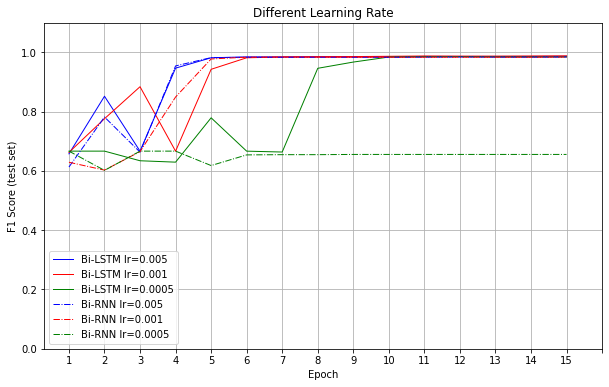

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

### 3.3.1 Bi-RNN model parameters (need 40 mins)

In [ ]:
# class Bi_RNN_Model(nn.Module):
#     def __init__(self):
#         super(Bi_RNN_Model, self).__init__()
#         self.rnn = nn.RNN(n_input, n_hidden, batch_first=True, bidirectional=True)
#         self.linear = nn.Linear(2*n_hidden,n_class)

#     def forward(self, x):        
#         x, h_n = self.rnn(x)
#         hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1) # concat the last hidden state from two direction
#         output = self.linear(hidden_out)
#         return output

In [ ]:
# n_input = train_embeddings.shape[2]
# n_class = np.unique(train_label_encoded).shape[0]

# n_hidden = 200
# batch_size = 256
# total_epoch = 15
# # learning_rate = 0.001

In [ ]:
# lr = [0.0005, 0.001, 0.005]
# rnn_history_f1 = {}

# for i in lr:
#   criterion = nn.CrossEntropyLoss()
#   model = Bi_RNN_Model().to(device)
#   optimizer = optim.Adam(model.parameters(), lr=i)

#   history_rnn = []
#   for epoch in range(total_epoch):
#       train_loss = 0
#       f1 = 0
#       for ind in range(0,train_embeddings.shape[0],batch_size):
#           input_batch = train_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
#           target_batch = train_label_encoded[ind:min(ind+batch_size, train_embeddings.shape[0])]
#           input_batch_torch = torch.from_numpy(input_batch).float().to(device)
#           target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

#           # test_input_batch = test_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
#           # test_target_batch = test_label_encoded[ind:min(ind+batch_size, train_embeddings.shape[0])]
#           test_input_torch = torch.from_numpy(test_embeddings).float().to(device)
#           test_target_torch = torch.from_numpy(test_label_encoded).view(-1).to(device)

#           model.train()
#           optimizer.zero_grad()
#           outputs = model(input_batch_torch) 
#           test_outputs = model(test_input_torch) 

#           loss = criterion(outputs, target_batch_torch)
#           test_loss = criterion(test_outputs, test_target_torch)

#           loss.backward()
#           optimizer.step()
#           predicted = torch.argmax(outputs, 1)
#           test_predicted = torch.argmax(test_outputs, 1)
#           train_loss += loss.item()
          
#       f1 = f1_score(predicted.cpu().numpy(), target_batch_torch.cpu().numpy(), average = 'weighted')
#       test_f1 = f1_score(test_predicted.cpu().numpy(), test_target_torch.cpu().numpy(), average = 'weighted')
#       print('Epoch: %d, train loss: %.5f, train f1 score: %.5f, test f1 score: %.5f'%(epoch + 1, train_loss, f1, test_f1))
#       history_rnn.append(test_f1)
#   rnn_history_f1[i] = history_rnn

#   print('Finished Training')
#   # torch.save(model,'BiRNN_005.pt')

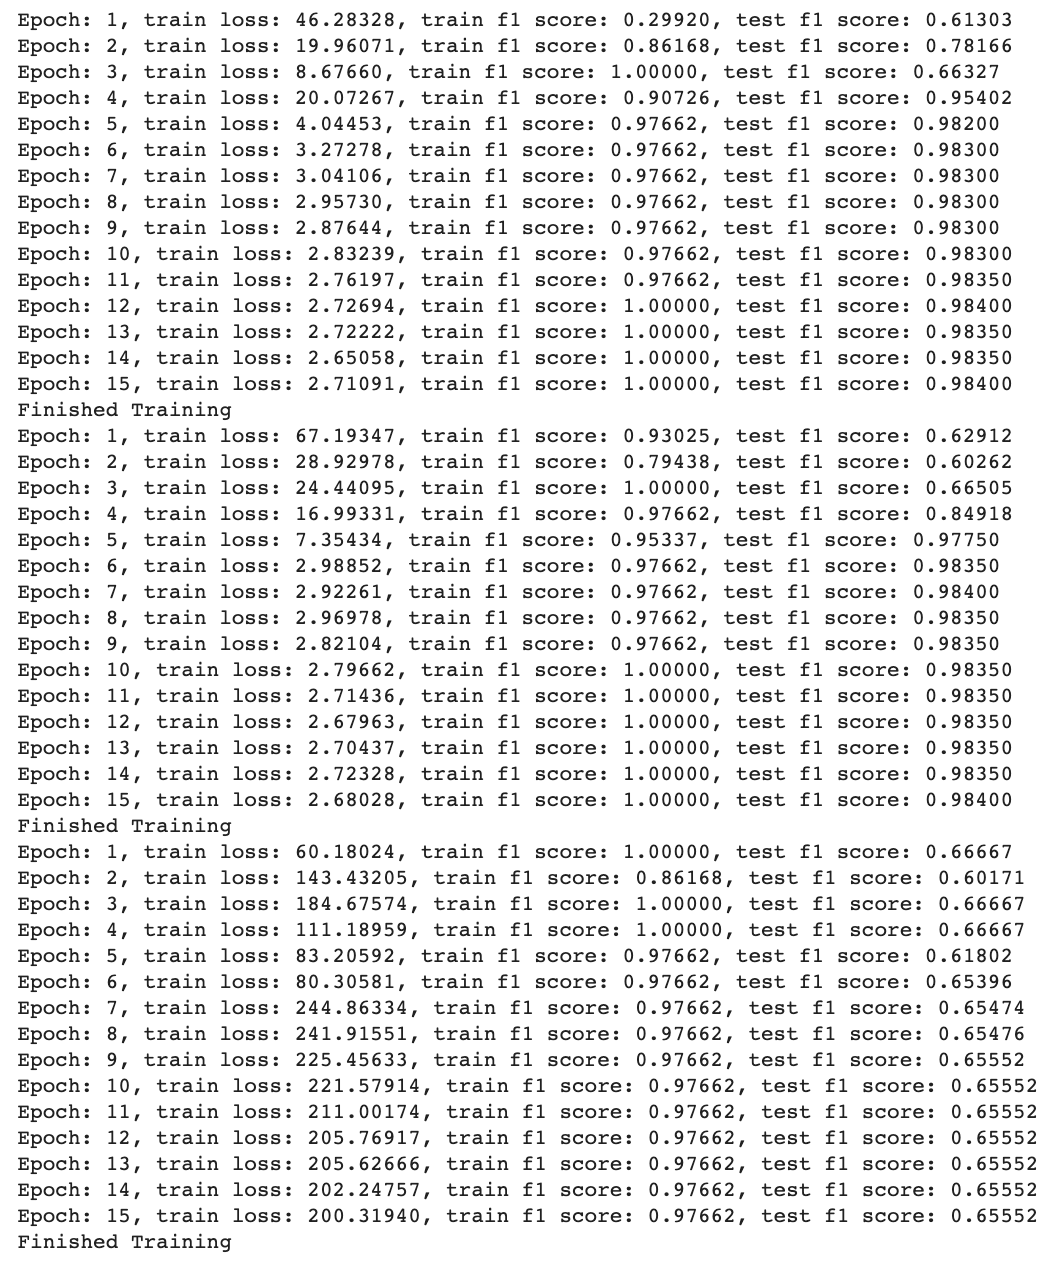

In [ ]:
# rnn_f1_history = pd.DataFrame(rnn_history_f1)

# plt.figure(figsize=(10,6))
# plt.plot(rnn_f1_history[0.0005], color = 'b', linewidth=1, label="lr=0.005")
# plt.plot(rnn_f1_history[0.001], color = 'r', linewidth=1, label="lr=0.001")
# plt.plot(rnn_f1_history[0.005], color = 'g', linewidth=1, label="lr=0.0005")

# plt.xlabel('Epoch')
# plt.ylabel('F1 Score (test set))
# plt.title("Different Learning Rate for Bi-RNN Model")
# # plt.legend(['Train set', 'Test set'], loc='upper right')
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.ylim(0.5, 1.1)
# plt.xticks(np.arange(0,16,1),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))
# plt.grid()
# plt.legend()
# plt.show()

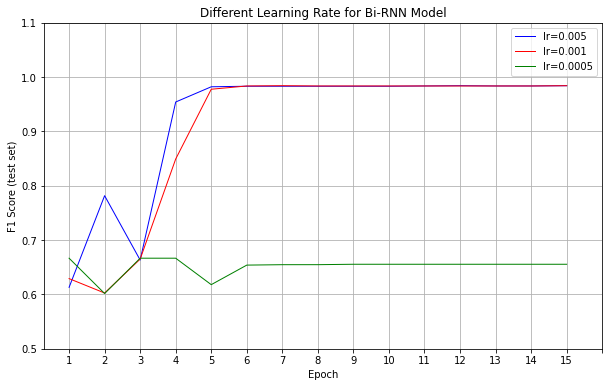

### 3.3.2 Bi-LSTM model parameters (need 3h)

In [ ]:
# class Bi_LSTM_Model(nn.Module):
#     def __init__(self):
#         super(Bi_LSTM_Model, self).__init__()
#         self.lstm = nn.LSTM(n_input, n_hidden, batch_first=True, bidirectional=True)
#         self.linear = nn.Linear(2*n_hidden,n_class)

#     def forward(self, x):        
#         lstm_out, (h_n,c_n) = self.lstm(x)
#         hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
#         output = self.linear(hidden_out)

#         return output

In [ ]:
# n_input = train_embeddings.shape[2]
# n_class = np.unique(train_label_encoded).shape[0]
# n_hidden = 200
# batch_size = 256
# total_epoch = 15

In [ ]:
# lr_LSTM = [0.0005, 0.001, 0.005]
# lstm_history_f1 = {}

# for i in lr_LSTM:
#   model = Bi_LSTM_Model().to(device)
#   criterion = nn.CrossEntropyLoss()
#   optimizer = optim.Adam(model.parameters(), lr= i )

#   input_torch = torch.from_numpy(np.array(train_embeddings)).float().to(device)
#   target_torch = torch.from_numpy(np.array(train_label_encoded)).view(-1).to(device)

#   history_lstm = []
#   for epoch in range(total_epoch):
#       train_loss = 0
#       f1 = 0
#       for ind in range(0, train_embeddings.shape[0], batch_size):
#           input_batch = train_embeddings[ind:min(ind+batch_size, train_embeddings.shape[0])]
#           target_batch = train_label_encoded[ind:min(ind+batch_size, train_embeddings.shape[0])]
#           input_batch_torch = torch.from_numpy(input_batch).float().to(device)
#           target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

#           test_input_torch = torch.from_numpy(test_embeddings).float().to(device)
#           test_target_torch = torch.from_numpy(test_label_encoded).view(-1).to(device)

#           model.train()
#           optimizer.zero_grad()
#           outputs = model(input_batch_torch) 
#           test_outputs = model(test_input_torch) 

#           loss = criterion(outputs, target_batch_torch)
#           test_loss = criterion(test_outputs, test_target_torch)

#           loss.backward()
#           optimizer.step()
#           predicted = torch.argmax(outputs, 1)
#           test_predicted = torch.argmax(test_outputs, 1)
#           train_loss += loss.item()
          
#       f1 = f1_score(predicted.cpu().numpy(), target_batch_torch.cpu().numpy(), average = 'weighted')
#       test_f1 = f1_score(test_predicted.cpu().numpy(), test_target_torch.cpu().numpy(), average = 'weighted')
#       print('Epoch: %d, train loss: %.5f, train f1 score: %.5f, test f1 score: %.5f'%(epoch + 1, train_loss, f1, test_f1))
#       history_lstm.append(test_f1)
#   lstm_history_f1[i] = history_lstm
#   print('Finished Training')

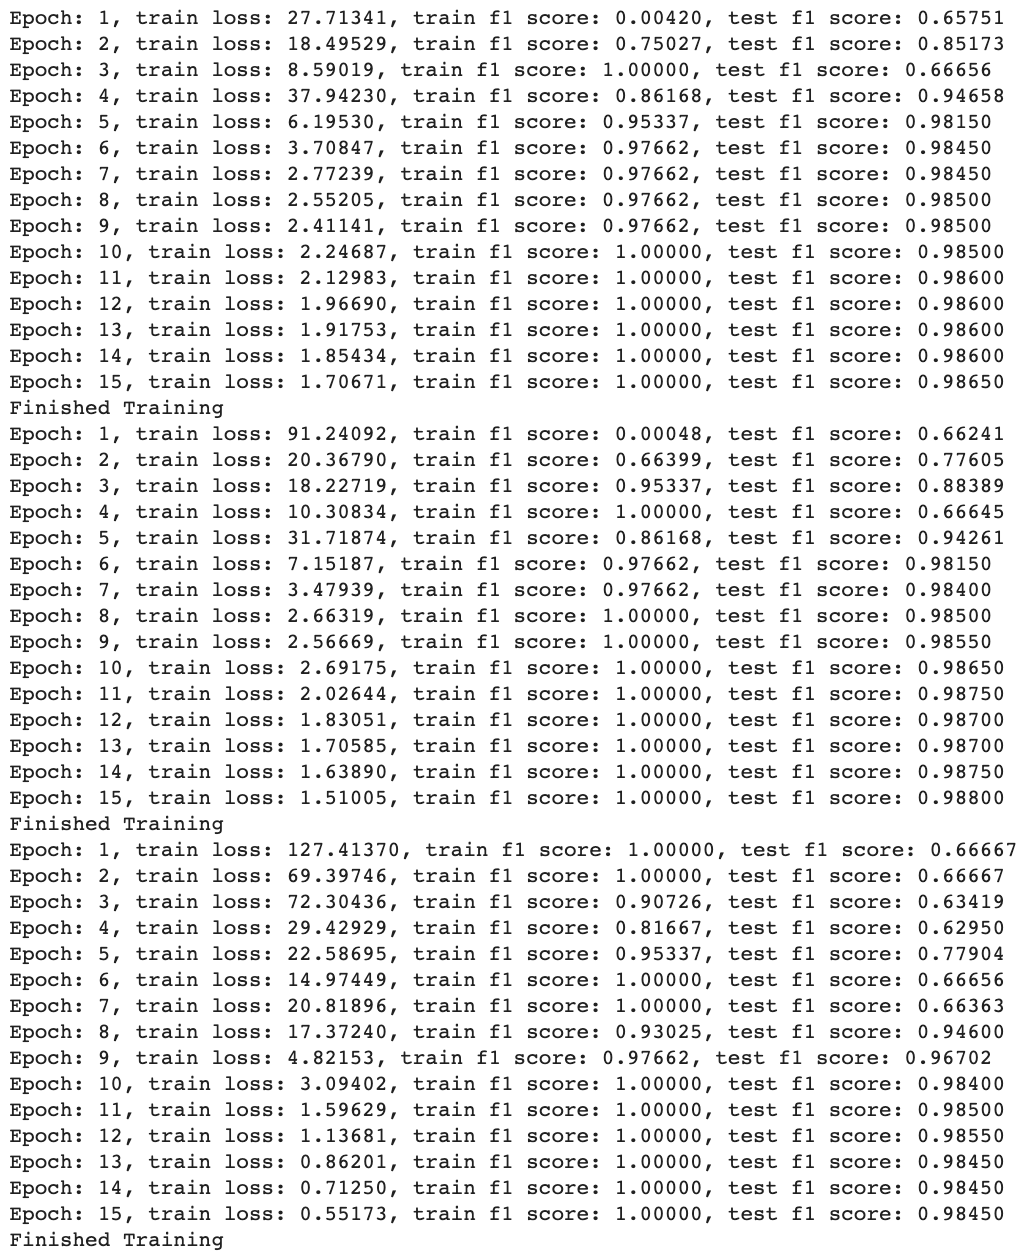

In [ ]:
# lstm_f1_history = pd.DataFrame(lstm_history_f1)

# plt.figure(figsize=(10,6))
# plt.plot(lstm_f1_history[0.0005], color = 'b', linewidth=1, label="lr=0.005")
# plt.plot(lstm_f1_history[0.001], color = 'r', linewidth=1, label="lr=0.001")
# plt.plot(lstm_f1_history[0.005], color = 'g', linewidth=1, label="lr=0.0005")

# plt.xlabel('Epoch')
# plt.ylabel('F1 Score')
# plt.title("Different Learning Rate for Bi-LSTM Model")
# # plt.legend(['Train set', 'Test set'], loc='upper right')
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.ylim(0, 1.1)
# plt.xticks(np.arange(0,16,1),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))
# plt.grid()
# plt.legend()
# plt.show()

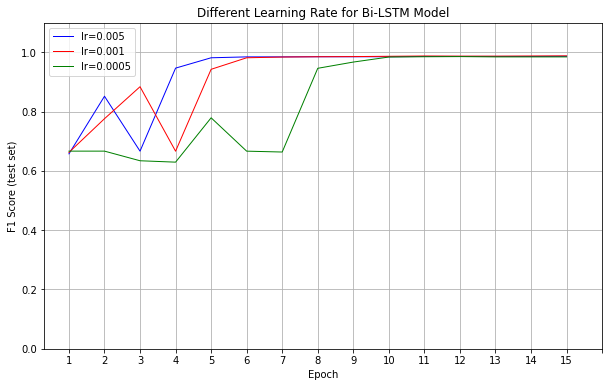

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(lstm_f1_history[0.0005], color = 'b', linewidth=1, label="Bi-LSTM lr=0.005")
# plt.plot(lstm_f1_history[0.001], color = 'r', linewidth=1, label="Bi-LSTM lr=0.001")
# plt.plot(lstm_f1_history[0.005], color = 'g', linewidth=1, label="Bi-LSTM lr=0.0005")
# plt.plot(rnn_f1_history[0.0005], color = 'b', linewidth=1, linestyle='-.', label="Bi-RNN lr=0.005")
# plt.plot(rnn_f1_history[0.001], color = 'r', linewidth=1, linestyle='-.', label="Bi-RNN lr=0.001")
# plt.plot(rnn_f1_history[0.005], color = 'g', linewidth=1, linestyle='-.', label="Bi-RNN lr=0.0005")

# plt.xlabel('Epoch')
# plt.ylabel('F1 Score (test set)')
# plt.title("Different Learning Rate")
# # plt.legend(['Train set', 'Test set'], loc='upper right')
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.ylim(0, 1.1)
# plt.xticks(np.arange(0,16,1),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))
# plt.grid()
# plt.legend()
# plt.show()